In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [24]:

data_dir = "C:\\Users\\hafee\\Videos\\internship\\Music dataset\\Data\\genres_original"

file_path=[]
labels=[]
for i in os.listdir(data_dir):
  for j in os.listdir(data_dir+'/'+i):
    file_path.append(data_dir+'/'+i+'/'+j)
    labels.append(i)
df=pd.DataFrame()
df['file_path']=file_path
df['labels']=labels
df

file_path labels
0    C:\Users\hafee\Videos\internship\Music dataset...  blues
1    C:\Users\hafee\Videos\internship\Music dataset...  blues
2    C:\Users\hafee\Videos\internship\Music dataset...  blues
3    C:\Users\hafee\Videos\internship\Music dataset...  blues
4    C:\Users\hafee\Videos\internship\Music dataset...  blues
..                                                 ...    ...
995  C:\Users\hafee\Videos\internship\Music dataset...   rock
996  C:\Users\hafee\Videos\internship\Music dataset...   rock
997  C:\Users\hafee\Videos\internship\Music dataset...   rock
998  C:\Users\hafee\Videos\internship\Music dataset...   rock
999  C:\Users\hafee\Videos\internship\Music dataset...   rock

[1000 rows x 2 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  1000 non-null   object
 1   labels     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


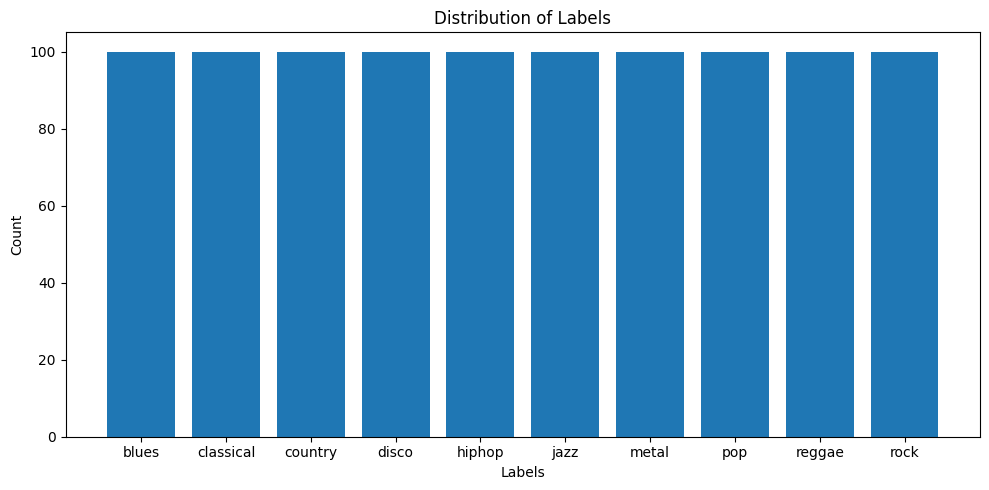

In [26]:
plt.figure(figsize=(10, 5))
plt.bar(df['labels'].unique(), df['labels'].value_counts())
x=df['labels'].index
y=df['labels'].values
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.tight_layout()
plt.show()

In [27]:
def plot_sound(path):
    plt.figure(figsize=(14, 5))
    x, sr = librosa.load(path)
    print("length {}, sample-rate {}".format(x.shape, sr))
    librosa.display.waveshow(x, sr=sr)
    
    return x

length (661794,), sample-rate 22050


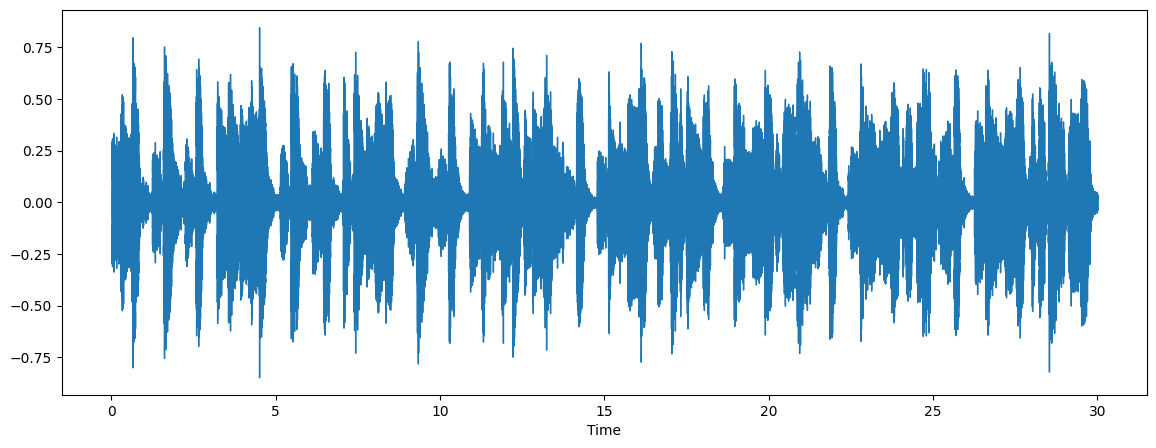

In [28]:
blues_path = 'C:\\Users\\hafee\\Videos\\internship\\Music dataset\\Data\\genres_original\\blues\\blues.00003.wav'
blues_audio = plot_sound(blues_path)
ipd.Audio(blues_path)

length (661794,), sample-rate 22050


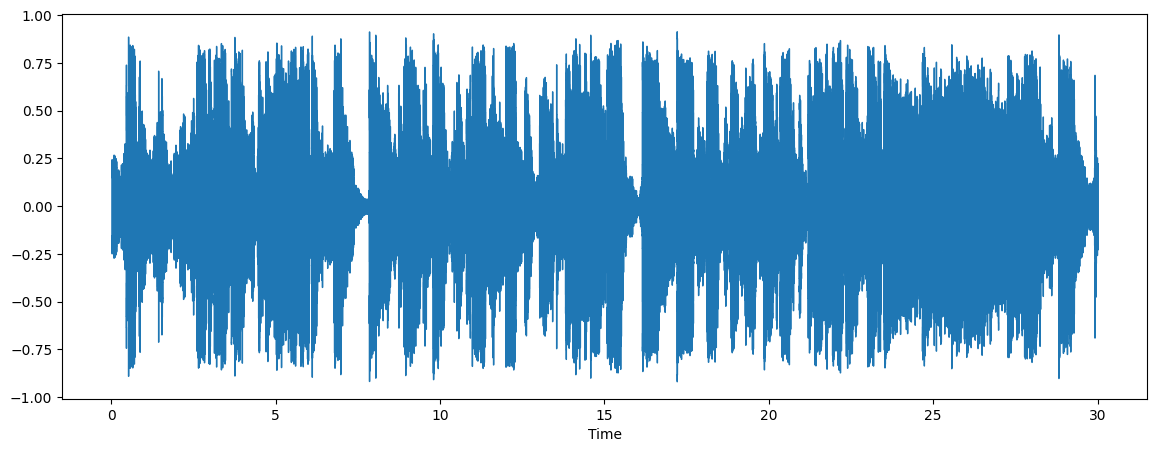

In [29]:
rock_path = 'C:\\Users\\hafee\\Videos\\internship\\Music dataset\\Data\\genres_original\\rock\\rock.00006.wav'
rock_audio = plot_sound(rock_path)
ipd.Audio(rock_path)

length (661504,), sample-rate 22050


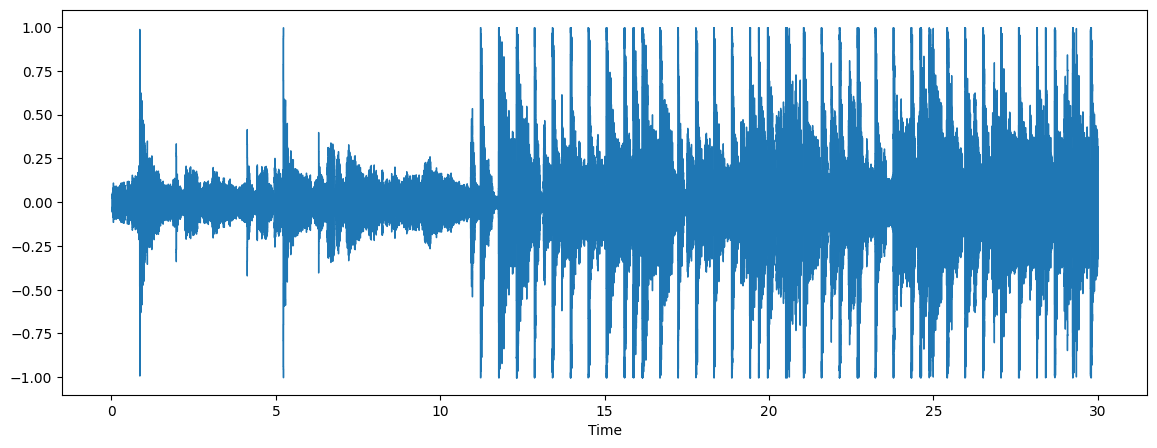

In [30]:
pop_path = 'C:\\Users\\hafee\\Videos\\internship\\Music dataset\\Data\\genres_original\\pop\\pop.00016.wav'
pop_audio = plot_sound(pop_path)
ipd.Audio(pop_path)

In [46]:
def extract_mfcc_vector(path):
    try:
        y, sr = librosa.load(path, sr=22050)
        y, _ = librosa.effects.trim(y)
        y = y / np.abs(y).max()
        y = librosa.util.fix_length(y, size=22050*2)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        mfcc_mean = np.mean(mfcc.T, axis=0)
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {path}: {e}")
        return np.nan

df['MFCC'] = df['file_path'].apply(extract_mfcc_vector)
df = df.dropna(subset=['MFCC'])

In [47]:
mfcc_df = pd.DataFrame(df['MFCC'].tolist(), columns=[f'mfcc_{i}' for i in range(20)])
df = pd.concat([df, mfcc_df], axis=1)
df.dropna(axis=1)
df

file_path labels  \
0    C:\Users\hafee\Videos\internship\Music dataset...  blues   
1    C:\Users\hafee\Videos\internship\Music dataset...  blues   
2    C:\Users\hafee\Videos\internship\Music dataset...  blues   
3    C:\Users\hafee\Videos\internship\Music dataset...  blues   
4    C:\Users\hafee\Videos\internship\Music dataset...  blues   
..                                                 ...    ...   
996  C:\Users\hafee\Videos\internship\Music dataset...   rock   
997  C:\Users\hafee\Videos\internship\Music dataset...   rock   
998  C:\Users\hafee\Videos\internship\Music dataset...   rock   
999  C:\Users\hafee\Videos\internship\Music dataset...   rock   
554                                                NaN    NaN   

                                                  MFCC      mfcc_0  \
0    [-106.70225, 125.73333, -20.842743, 42.130047,... -106.702248   
1    [-271.19464, 123.74972, 24.979225, 50.120033, ... -271.194641   
2    [-94.284966, 130.23283, -31.878948, 39.09307, ...  -94.284966   
3    [-209.31621, 163.03954, 7.4328156, 28.213085, ... -209.316208   
4    [-175.52678, 148.84398, -39.58331, 27.149437, ... -175.526779   
..                                                 ...         ...   
996  [-158.21104, 112.60947, -30.136982, 56.675674,... -138.939636   
997  [-138.93964, 136.44937, -32.051594, 55.26875, ... -164.443359   
998  [-164.44336, 129.21747, -1.3104769, 63.678913,... -227.904999   
999  [-227.905, 137.47243, -29.599693, 40.180737, -...         NaN   
554                                                NaN         NaN   

         mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  ...  \
0    125.733330 -20.842743  42.130047  -7.251808  18.525370 -15.307319  ...   
1    123.749718  24.979225  50.120033  12.791177  27.225695   4.347555  ...   
2    130.232834 -31.878948  39.093071 -18.689726  30.253250 -15.777898  ...   
3    163.039536   7.432816  28.213085   4.613332  11.427294  -0.351406  ...   
4    148.843979 -39.583309  27.149437 -31.248867  12.405354 -29.697958  ...   
..          ...        ...        ...        ...        ...        ...  ...   
996  136.449371 -32.051594  55.268749   0.320832  16.052374 -12.525064  ...   
997  129.217468  -1.310477  63.678913  13.663118  27.703594 -12.538507  ...   
998  137.472427 -29.599693  40.180737  -0.608362  31.696424   3.649327  ...   
999         NaN        NaN        NaN        NaN        NaN        NaN  ...   
554         NaN        NaN        NaN        NaN        NaN        NaN  ...   

       mfcc_10    mfcc_11    mfcc_12    mfcc_13    mfcc_14   mfcc_15  \
0   -10.508090  10.395751  -4.125296   9.771701  -5.905857 -2.238103   
1    -0.944668   9.324069   2.831428   3.363186  -3.350071  0.564842   
2   -15.923021   5.562221  -9.221704  -3.155392  -9.670361  2.860129   
3     1.419301   4.487967  -2.549578  -0.999128  -2.304102  1.516250   
4   -17.814764   0.704056 -14.798617  -5.819796 -11.875337 -3.420753   
..         ...        ...        ...        ...        ...       ...   
996 -10.746893   2.059597 -15.963120   1.193426  -3.009887 -2.751579   
997 -15.522577   6.985904  -9.290804   1.195508  -5.650700 -1.788595   
998   4.862961   7.123267 -16.443939  10.621151  -0.093273  4.320803   
999        NaN        NaN        NaN        NaN        NaN       NaN   
554  -0.060016  -2.584626  -5.543536  -4.995187  -3.577925 -1.443385   

      mfcc_16   mfcc_17    mfcc_18    mfcc_19  
0   -1.992416  0.390925  -4.613748  -0.443014  
1    1.997861  1.383212  -0.216766   1.553962  
2   -7.359723 -0.280320  -4.469512  -5.192780  
3    1.196474  2.154114   0.004822  -4.772750  
4   -4.721407  2.228259  -9.991329 -11.853442  
..        ...       ...        ...        ...  
996 -9.114152 -2.603141 -18.584003   2.191378  
997 -2.772166  4.867480  -3.268233  -5.592128  
998 -4.795068 -6.677033  -3.707282   0.482133  
999       NaN       NaN        NaN        NaN  
554 -2.291347  0.800740   4.658740   0.209299  

[1000 rows x 43 columns]

In [48]:
df = df.dropna(subset=['labels'])
print(df['labels'].unique())

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [49]:
X=df.drop(columns=['file_path','labels','MFCC'])
y=df[['labels']]

In [50]:
le = LabelEncoder()
y = le.fit_transform(y)

In [51]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2, random_state=42,stratify=y)

In [53]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
train_mask = ~np.isnan(X_train).any(axis=1)
test_mask = ~np.isnan(X_test).any(axis=1)

# طبّق الفلترة
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_test = X_test[test_mask]
y_test = y_test[test_mask]

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rf.score(X_train,y_train)

1.0

In [57]:
y_pred = rf.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.485


Text(95.72222222222221, 0.5, 'Truth')

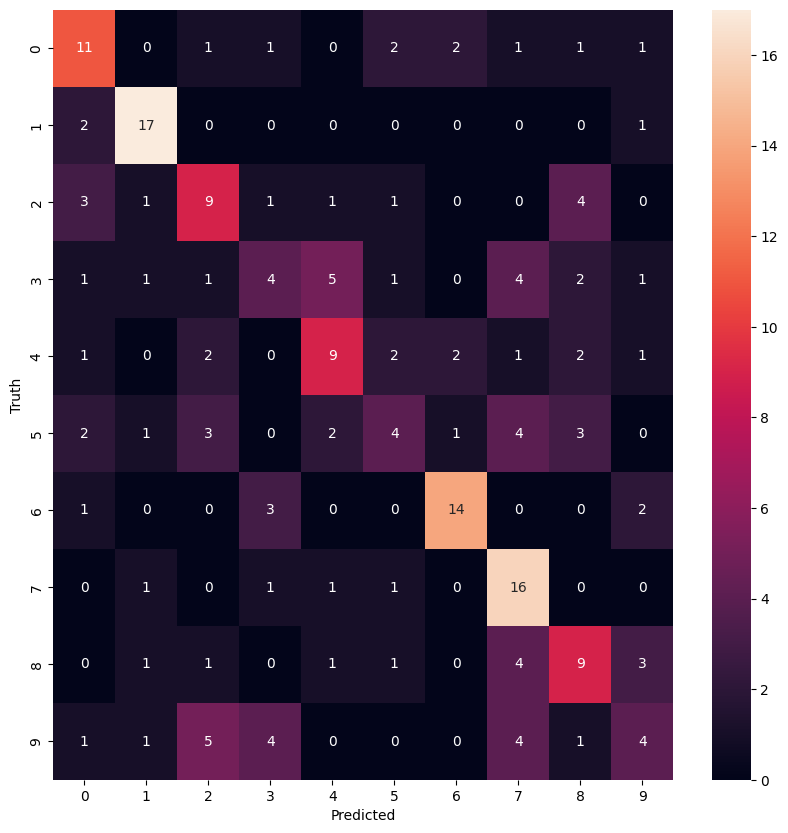

In [58]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        20
           1       0.74      0.85      0.79        20
           2       0.41      0.45      0.43        20
           3       0.29      0.20      0.24        20
           4       0.47      0.45      0.46        20
           5       0.33      0.20      0.25        20
           6       0.74      0.70      0.72        20
           7       0.47      0.80      0.59        20
           8       0.41      0.45      0.43        20
           9       0.31      0.20      0.24        20

    accuracy                           0.48       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.47      0.48      0.47       200

